In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
HRDB = pd.read_csv('HRDB_cleaned.csv')
HRDB


 # Career Growth and Job Stability
 # 1. KPI- Average Years Since Last Promotion by Attrition Status

,Attrition,YearsSinceLastPromotion
0,0,2.23
1,1,1.95


C:\Users\mamaelen\AppData\Local\Temp\ipykernel_19268\2826100180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_promotion_years, x='Attrition', y='YearsSinceLastPromotion', palette='viridis')


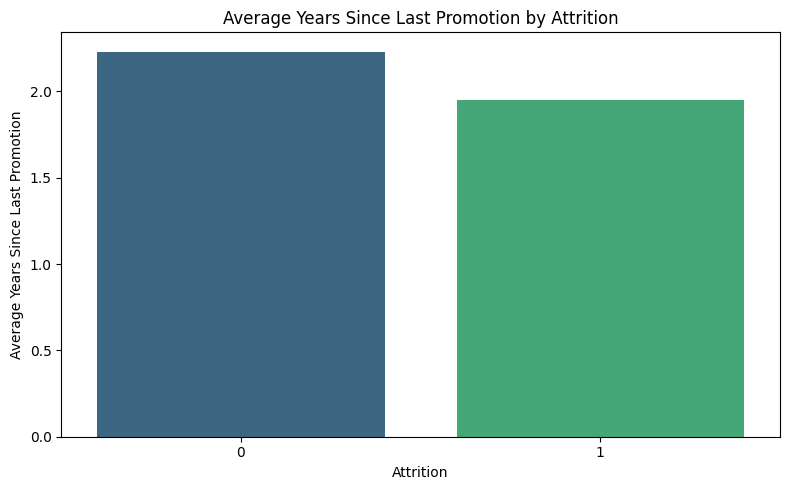

In [14]:

# average Years Since Last Promotion by Attrition status
avg_promotion_years = HRDB.groupby('Attrition')['YearsSinceLastPromotion'].mean().round(2).reset_index()
display(avg_promotion_years)

# Show the corresponding graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=avg_promotion_years, x='Attrition', y='YearsSinceLastPromotion', palette='viridis')
plt.title('Average Years Since Last Promotion by Attrition')
plt.ylabel('Average Years Since Last Promotion')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()


Conclusion- Employees who leave DO NOT have longer gaps between promotions. The issue is not being stuck in an entry level position.

#  2. Attrition rate by job level 


,JobLevel,Attrition Rate (Turnover %)
0,1,26.3
1,2,9.7
2,3,14.7
3,4,4.7
4,5,7.2


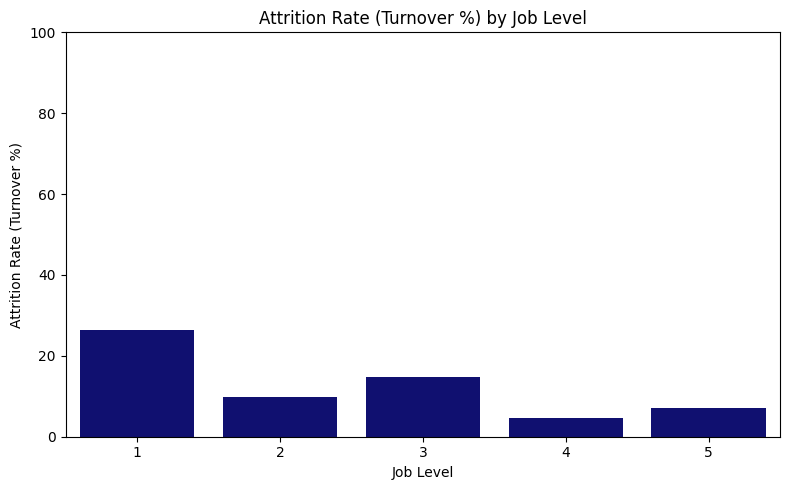

In [20]:

avg_attrition_joblevel = HRDB.groupby(job_level_col)[attrition_col].mean().reset_index()
avg_attrition_joblevel['Attrition Rate (Turnover %)'] = (avg_attrition_joblevel[attrition_col] * 100).round(1)
avg_attrition_joblevel = avg_attrition_joblevel.drop(columns=[attrition_col])
display(avg_attrition_joblevel)

# Visualize the relationship (as percentage)
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_attrition_joblevel,
    x=job_level_col,
    y='Attrition Rate (Turnover %)',
    color='navy'
)
plt.title('Attrition Rate (Turnover %) by Job Level')
plt.ylabel('Attrition Rate (Turnover %)')
plt.xlabel('Job Level')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()




Conclusion- Job Level 1- entry level, young employees= highest attrition. Makes sense as they have the least rewarding jobs and work conditions.
BUT- why Job Level 3 have higher atrition rate than levels 2,4,5?

# 3. How years at company and years in current role influence attrition rate. 

C:\Users\mamaelen\AppData\Local\Temp\ipykernel_19268\2453880960.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_company_years = HRDB.groupby('YearsAtCompany_Group')[attrition_col].mean().reset_index()


,YearsAtCompany_Group,Attrition Rate (%)
0,<2,34.9
1,2-5,15.5
2,6-10,12.3
3,11-15,6.5
4,16-20,6.9
5,21+,12.1


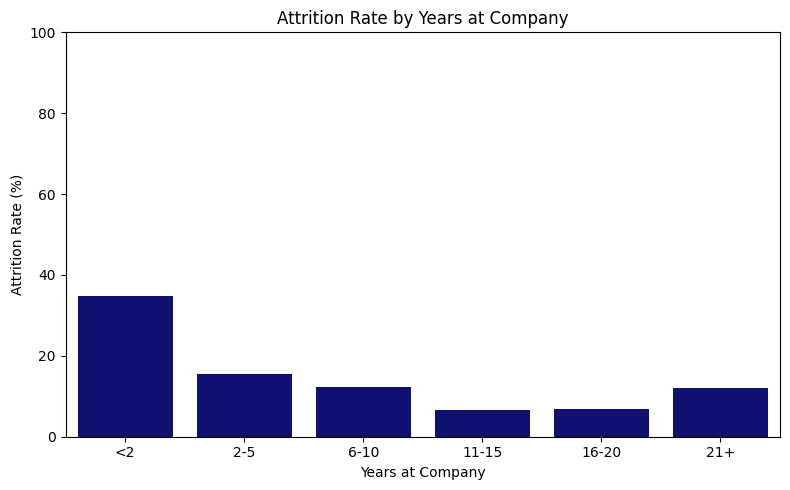

In [ ]:
# Analyze years at company influence on attrition rate
# Create appropriate bins and labels for years at company

max_year = HRDB['YearsAtCompany'].max()

# We need number of labels to be one less than number of bins
# Let's define bin edges to make 6 groups: <2, 2-5, 6-10, 11-15, 16-20, 21+
years_at_company_bins = [0, 2, 6, 11, 16, 21, max_year + 1]
years_at_company_labels = ['<2', '2-5', '6-10', '11-15', '16-20', '21+']

HRDB['YearsAtCompany_Group'] = pd.cut(
    HRDB['YearsAtCompany'], 
    bins=years_at_company_bins, 
    labels=years_at_company_labels, 
    right=False,
    include_lowest=True
)

attrition_by_company_years = HRDB.groupby('YearsAtCompany_Group')[attrition_col].mean().reset_index()
attrition_by_company_years['Attrition Rate (%)'] = (attrition_by_company_years[attrition_col] * 100).round(1)
attrition_by_company_years = attrition_by_company_years.drop(columns=[attrition_col])
display(attrition_by_company_years)

plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_by_company_years,
    x='YearsAtCompany_Group',
    y='Attrition Rate (%)',
    color='navy'
)
plt.title('Attrition Rate by Years at Company')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Years at Company')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Conclusion 1- newcomers leave more frequently. the more they stay the less likely for them to leave. after 20 years attrition grows because of retirement

C:\Users\mamaelen\AppData\Local\Temp\ipykernel_19268\2969513565.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_role_years = HRDB.groupby('YearsInCurrentRole_Group')[attrition_col].mean().reset_index()


,YearsInCurrentRole_Group,Attrition Rate (%)
0,<2,27.9
1,2-4,16.2
2,5-7,11.5
3,8+,7.6


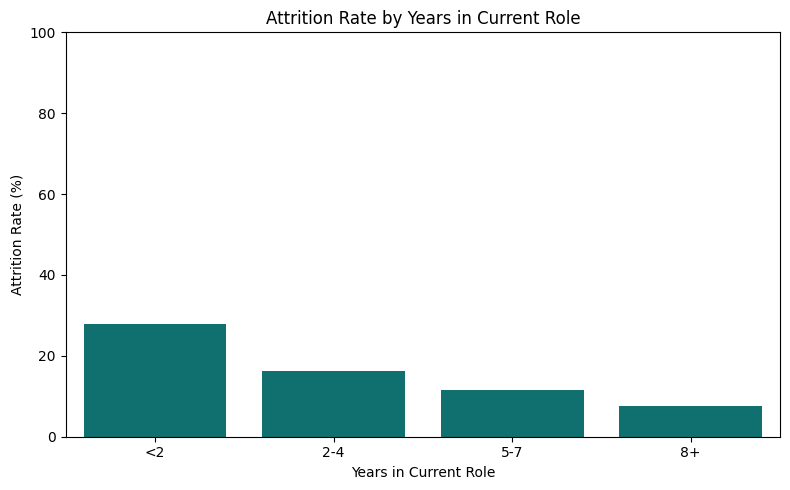

In [50]:
# Analyze years in current role influence on attrition rate
# Create appropriate bins and labels for years in current role

max_year_role = HRDB['YearsInCurrentRole'].max()

# Bins: <2, 2-4, 5-7, 8+
years_in_role_bins = [0, 2, 5, 8, max_year_role + 1]
years_in_role_labels = ['<2', '2-4', '5-7', '8+']

HRDB['YearsInCurrentRole_Group'] = pd.cut(
    HRDB['YearsInCurrentRole'],
    bins=years_in_role_bins,
    labels=years_in_role_labels,
    right=False,
    include_lowest=True
)

attrition_by_role_years = HRDB.groupby('YearsInCurrentRole_Group')[attrition_col].mean().reset_index()
attrition_by_role_years['Attrition Rate (%)'] = (attrition_by_role_years[attrition_col] * 100).round(1)
attrition_by_role_years = attrition_by_role_years.drop(columns=[attrition_col])
display(attrition_by_role_years)

plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_by_role_years,
    x='YearsInCurrentRole_Group',
    y='Attrition Rate (%)',
    color='teal'
)
plt.title('Attrition Rate by Years in Current Role')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Years in Current Role')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Conclusion 2- the more people stay in their role -the less likely for them to leave.
Most attrition is for New in the company and new in their role = under 5 years.
# HR should consider investing more in finding a good fit for roles, as well as managing expectations